#Eseries Class

###Contents
- [Exponential-Series Representation of Quantum Objects](#exponential)
- [Applications of Exponential-Series](#applications)

In [3]:
%matplotlib inline
import numpy as np
from pylab import *
from qutip import *

<a id='exponential'></a>

##Exponential-Series Representation of Time-Dependent Quantum Objects

The `eseries` object in QuTiP is a representation of an exponential-series expansion of time-dependent quantum objects (a concept borrowed from the quantum optics toolbox). 

An exponential series is parameterized by its amplitude coefficients $c_i$ and rates $r_i$, so that the series takes the form 
$E(t) = \sum_i c_i e^{r_i t}$. The coefficients are typically quantum objects (i.e. states, operators, etc.), so that the value of the eseries also is a quantum object, and the rates can be either real or complex numbers (describing decay rates and oscillation frequencies, respectively). Note that all amplitude coefficients in an exponential series must be of the same dimensions and composition. 

In QuTiP, an exponential series object is constructed by creating an instance of the class `eseries`:

In [4]:
es1 = eseries(sigmax(), 1j)

where the first argument is the amplitude coefficient (here, the sigma-X operator), and the second argument is the rate. The eseries in this example represents the time-dependent operator $\sigma_x e^{i t}$.  To add more terms to an `eseries` object we simply add objects using the ``+`` operator:

In [5]:
omega = 1.0
es2 = (eseries(0.5 * sigmax(), 1j * omega) + eseries(0.5 * sigmax(), -1j * omega))

The `eseries` in this example represents the operator $0.5 \sigma_x e^{i\omega t} + 0.5 \sigma_x e^{-i\omega t}$, which is the exponential series representation of $\sigma_x \cos(\omega t)$. Alternatively, we can also specify a list of amplitudes and rates when the `eseries` is created:

In [6]:
es2 = eseries([0.5 * sigmax(), 0.5 * sigmax()], [1j * omega, -1j * omega])

We can inspect the structure of an `eseries` object by printing it to the standard output console:

In [7]:
es2

ESERIES object: 2 terms
Hilbert space dimensions: [[2], [2]]
Exponent #0 = -1j
Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.   0.5]
 [ 0.5  0. ]]
Exponent #1 = 1j
Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.   0.5]
 [ 0.5  0. ]]

and we can evaluate it at time $t$ by using the `esval` function or the `value` method:

In [8]:
 esval(es2, 0.0)     # equivalent to es2.value(0.0)

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  1.]
 [ 1.  0.]]

In [9]:
es2.value(0)

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  1.]
 [ 1.  0.]]

or for a list of times ``[0.0, 1.0 * pi, 2.0 * pi]``:

In [10]:
times = [0.0, 1.0 * np.pi, 2.0 * np.pi]
esval(es2, times)

array([ Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  1.]
 [ 1.  0.]],
       Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0. -1.]
 [-1.  0.]],
       Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  1.]
 [ 1.  0.]]], dtype=object)

In [11]:
es2.value(times)

array([ Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  1.]
 [ 1.  0.]],
       Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0. -1.]
 [-1.  0.]],
       Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  1.]
 [ 1.  0.]]], dtype=object)

To calculate the expectation value of an time-dependent operator represented by an `eseries`, we use the `expect` function. For example, consider the operator $\sigma_x \cos(\omega t) + \sigma_z\sin(\omega t)$, and say we would like to know the expectation value of this operator for a spin in its excited state (``rho = fock_dm(2,1)`` produce this state):

In [12]:
es3 = (eseries([0.5*sigmaz(), 0.5*sigmaz()], [1j, -1j]) + 
       eseries([-0.5j*sigmax(), 0.5j*sigmax()], [1j, -1j]))

rho = fock_dm(2, 1)
es3_expect = expect(rho, es3)
es3_expect

ESERIES object: 2 terms
Hilbert space dimensions: [[1, 1]]
Exponent #0 = (-0-1j)
(-0.5+0j)
Exponent #1 = 1j
(-0.5+0j)

Note the expectation value of the `eseries` object, ``expect(rho, es3)``, itself is an `eseries`, but with amplitude coefficients that are c-numbers instead of quantum operators. To evaluate the c-number `eseries` at the times `times` we use ``es3_expect.value(times)`` or equivalently ``esval(es3_expect, times)``.

In [13]:
es3_expect.value([0.0, pi/2])

array([ -1.00000000e+00,  -6.12323400e-17])

<a id='applications'></a>

##Applications of Exponential Series

The exponential series formalism can be useful for the time-evolution of quantum systems. One approach to calculating the time evolution of a quantum system is to diagonalize its Hamiltonian (or Liouvillian, for dissipative systems) and to express the propagator (e.g., $\exp(-iHt) \rho \exp(iHt)$) as an exponential series. 

The QuTiP function `ode2es` and `essolve` use this method to evolve quantum systems in time. The exponential series approach is particularly suitable for cases when the same system is to be evolved for many different initial states, since the diagonalization only needs to be performed once (as opposed to e.g. the ode solver that would need to be ran independently for each initial state).

As an example, consider a spin-1/2 with a Hamiltonian pointing in the $\sigma_z$ direction, and that is subject to noise causing relaxation. For a spin originally is in the up state, we can create an `eseries` object describing its dynamics by using the `es2ode` function:

In [14]:
psi0 = basis(2,1)
H = sigmaz()
L = liouvillian(H, [sqrt(1.0) * destroy(2)])
es = ode2es(L, psi0)

The `ode2es` function diagonalizes the Liouvillian $L$ and creates an exponential series with the correct eigenfrequencies and amplitudes for the initial state 
$\psi_0$ (`psi0`).

We can examine the resulting `eseries` object by printing a text representation:

In [15]:
es

ESERIES object: 2 terms
Hilbert space dimensions: [[2], [2]]
Exponent #0 = (-1+0j)
Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[-1.  0.]
 [ 0.  1.]]
Exponent #1 = 0j
Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0.  0.]]

or by evaluating it and arbitrary points in time (here at 0.0 and 1.0):

In [16]:
es.value([0.0, 1.0])

array([ Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  0.]
 [ 0.  1.]],
       Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.63212056  0.        ]
 [ 0.          0.36787944]]], dtype=object)

and the expectation value of the exponential series can be calculated using the `expect` function:

In [17]:
 es_expect = expect(sigmaz(), es)

The result `es_expect` is now an exponential series with c-numbers as amplitudes, which easily can be evaluated at arbitrary times:

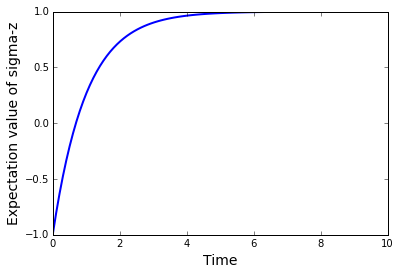

In [21]:
times = linspace(0.0, 10.0, 100)
sz_expect = es_expect.value(times)
plot(times, sz_expect, lw=2)
xlabel("Time", fontsize=14)
ylabel("Expectation value of sigma-z", fontsize=14)
show()

In [18]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/guide.css", "r").read()
    return HTML(styles)
css_styling()